# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# magic line
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up variables for query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Testing city
# city = "yellowknife"

# set up lists to hold request data
country_list = []
max_temp_list = []
clouds_list = []
humidity_list = []
wind_list = []
lat_list = []
long_list = []
date_list = []
city_number = []
final_cities = []

# Build query URL

# Start counter for city numbers
counter = 1
# create for loop to retrieve info for each city in the random city list
for city in cities:
    # Get weather data for each city
    weather_json = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units).json()   
    # Use Try/Except to skip any cities that do not return weather info
    try:
    # append specific weather data to the lists
        country_list.append(weather_json["sys"]["country"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        clouds_list.append(weather_json["clouds"]["all"])
        humidity_list.append(weather_json["main"]["humidity"])
        lat_list.append(weather_json["coord"]["lat"])
        long_list.append(weather_json["coord"]["lon"])
        date_list.append(weather_json["dt"])
        wind_list.append(weather_json["wind"]["speed"])
        final_cities.append(weather_json["name"])
        city_number.append(counter)
        print(f"Processing city number {counter}: {city.title()}.")
        counter = counter + 1
    except:
        print(f"Weather data for {city.title()} not found, skipping...")
        pass


Processing city number 1: Port Elizabeth.
Processing city number 2: Avarua.
Processing city number 3: Severo-Kurilsk.
Processing city number 4: Albany.
Processing city number 5: Copiapo.
Processing city number 6: Iqaluit.
Processing city number 7: Ushuaia.
Processing city number 8: Doka.
Processing city number 9: Salalah.
Processing city number 10: Castro.
Weather data for Barentsburg not found, skipping...
Processing city number 11: Bloemfontein.
Processing city number 12: Punta Arenas.
Processing city number 13: Yulara.
Processing city number 14: Kodiak.
Processing city number 15: Nuuk.
Processing city number 16: Olafsvik.
Processing city number 17: Kapit.
Processing city number 18: Tuktoyaktuk.
Processing city number 19: Iwanai.
Processing city number 20: Te Anau.
Weather data for Nizhneyansk not found, skipping...
Processing city number 21: Ponta Do Sol.
Processing city number 22: Hermanus.
Processing city number 23: Pisco.
Processing city number 24: Grindavik.
Processing city numb

Processing city number 196: Aasiaat.
Processing city number 197: Broome.
Processing city number 198: Concarneau.
Processing city number 199: Camana.
Processing city number 200: Vallenar.
Processing city number 201: Stollberg.
Processing city number 202: Oksfjord.
Processing city number 203: Port Lincoln.
Weather data for Artyk not found, skipping...
Processing city number 204: Ndola.
Processing city number 205: Hobyo.
Processing city number 206: Kaitangata.
Processing city number 207: Safaga.
Processing city number 208: Clyde River.
Processing city number 209: Mogadouro.
Weather data for Grand Centre not found, skipping...
Processing city number 210: Santo Antonio Do Ica.
Processing city number 211: Victoria.
Processing city number 212: Moratuwa.
Processing city number 213: Ardesen.
Processing city number 214: Ganzhou.
Weather data for Urdzhar not found, skipping...
Processing city number 215: Saint-Leu.
Processing city number 216: Leningradskiy.
Processing city number 217: Banda Aceh.

Processing city number 382: Bima.
Processing city number 383: Bay Roberts.
Processing city number 384: Catamarca.
Processing city number 385: Remontnoye.
Processing city number 386: Corn Island.
Processing city number 387: Eldorado.
Weather data for Kuche not found, skipping...
Processing city number 388: Sangar.
Processing city number 389: Vestmanna.
Processing city number 390: Emerald.
Processing city number 391: Huilong.
Processing city number 392: Arua.
Processing city number 393: Honningsvag.
Processing city number 394: Korla.
Processing city number 395: Charagua.
Processing city number 396: Souillac.
Processing city number 397: Sambava.
Processing city number 398: Filingue.
Processing city number 399: Touros.
Processing city number 400: Haines Junction.
Processing city number 401: Kirovskiy.
Processing city number 402: Langfang.
Processing city number 403: Barcelos.
Processing city number 404: Santiago.
Processing city number 405: Pecos.
Processing city number 406: Bellevue.
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create data frame with the retrieved city weather data
city_df = pd.DataFrame({
    "Number" : city_number,
    "City": final_cities,
    "Country": country_list,
    "Latitude" : lat_list ,
    "Longitude" : long_list ,
    "Date" : date_list ,
    "Max Temp (C)": max_temp_list,
    "Cloudiness %" : clouds_list,
    "Humidity %" : humidity_list,
    "Wind Speed (kph)" : wind_list 
})

# Ensure that all rows have data for each column
city_df.count()

Number              543
City                543
Country             543
Latitude            543
Longitude           543
Date                543
Max Temp (C)        543
Cloudiness %        543
Humidity %          543
Wind Speed (kph)    543
dtype: int64

In [5]:
# Excport dataframe to csv
city_df.set_index('Number')
city_df.to_csv(output_data_file, index=False, header=True)
city_df.head(10)

,Number,City,Country,Latitude,Longitude,Date,Max Temp (C),Cloudiness %,Humidity %,Wind Speed (kph)
0,1,Port Elizabeth,ZA,-33.92,25.57,1579821494,19.00,11,77,5.70
1,2,Avarua,CK,-21.21,-159.78,1579821494,28.00,90,88,4.10
2,3,Severo-Kuril'sk,RU,50.68,156.12,1579821232,-8.32,82,82,3.71
3,4,Albany,US,42.60,-73.97,1579821494,0.00,90,58,0.42
4,5,Copiapo,CL,-27.37,-70.33,1579821453,25.00,0,47,6.20
5,6,Iqaluit,CA,63.75,-68.51,1579821494,-33.00,5,67,12.90
6,7,Ushuaia,AR,-54.80,-68.30,1579821387,10.00,75,71,10.80
7,8,Doka,SD,13.52,35.77,1579821494,15.10,32,31,5.49
8,9,Salalah,OM,17.02,54.09,1579821495,24.00,75,78,1.50
9,10,Castro,BR,-24.79,-50.01,1579821495,15.55,100,98,3.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

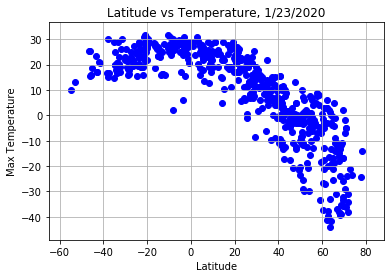

In [20]:
# Create a scatter plot, label it, and export to png
plt.scatter( city_df["Latitude"], city_df["Max Temp (C)"], marker="o", color="blue")
plt.title("Latitude vs Temperature, 1/23/2020")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Max Temp (C)"].min())-5, (city_df["Max Temp (C)"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("../output/LatVsTemp.png")
plt.show()


* In the Northern Hemisphere, the warmest temperatures around the equator and the temperatures drop the further north you go. 
* In the Southern Hemisphere, the warmest temperatures are around 35 degrees south. South from that point, the temperatures will drop a bit to around 10C.

#### Latitude vs. Humidity Plot

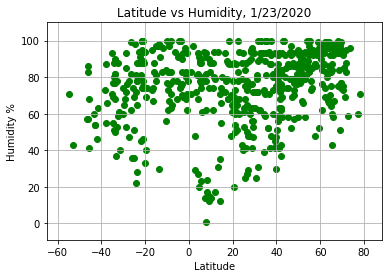

In [21]:
# Create a scatter plot, label it, and export to png
plt.scatter( city_df["Latitude"], city_df["Humidity %"], marker="o", color="green")
plt.title("Latitude vs Humidity, 1/23/2020")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Humidity %"].min())-10, (city_df["Humidity %"].max()) +10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("../output/LatVsHumidity.png")
plt.show()

* There is no clear trend in humidity.
* However, the locations with the lowest % humidity are between 0 and 20 degrees north. 

#### Latitude vs. Cloudiness Plot

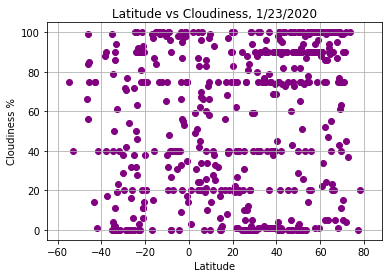

In [22]:
# Create a scatter plot, label it, and export to png
plt.scatter( city_df["Latitude"], city_df["Cloudiness %"], marker="o", color="purple")
plt.title("Latitude vs Cloudiness, 1/23/2020")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Cloudiness %"].min())-5, (city_df["Cloudiness %"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig("../output/LatVsCloudiness.png")
plt.show()

* There is no clear trend in cloudiness vs latitude. 
* There are a lot of locations that are clumped at 0, 20, 40, 75 and 100% cloudy. 

#### Latitude vs. Wind Speed Plot

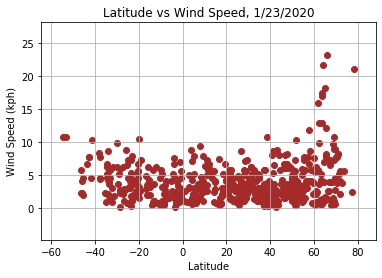

In [23]:
# Create a scatter plot, label it, and export to png
plt.scatter( city_df["Latitude"], city_df["Wind Speed (kph)"], marker="o", color="brown")
plt.title("Latitude vs Wind Speed, 1/23/2020")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Wind Speed (kph)"].min())-5, (city_df["Wind Speed (kph)"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid()
plt.savefig("../output/LatVsWind.png")
plt.show()

* It is rare for there to be wind speeds higher than 10 kph
* The highest wind speeds (around 22 kph) are in the northern hemisphere, but there are also more samples in the northern hemisphere. 

## Linear Regression

In [24]:
# Create a function to create Linear Regression plots
def linreg(x_column, y_column):
    # input is the columns for x and for y
    x_values = x_column
    y_values = y_column
    # perform linear regression and calculate regress values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot the x and y columns, annotate the line equation
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_column.min() + 5,y_column.min() +5),fontsize=15,color="red")
    plt.title(f'{x_column.name} vs {y_column.name} on 1/23/2020')
    plt.xlabel(f'{x_column.name}')
    plt.ylabel(f'{y_column.name}')
    print(f"The r-squared is: {rvalue}")
    # export to png
    plt.savefig(f"../output/LinReg{x_column.name}{y_column.name}.png")
    plt.show()


In [25]:
# Create Northern and Southern Hemisphere DataFrames
north = city_df.loc[city_df["Latitude"] >= 0, :]
north = north.rename(columns={"Latitude":"N Latitude"})
south = city_df.loc[city_df["Latitude"] < 0, :]
south = south.rename(columns={"Latitude":"S Latitude"})


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8367120401416406


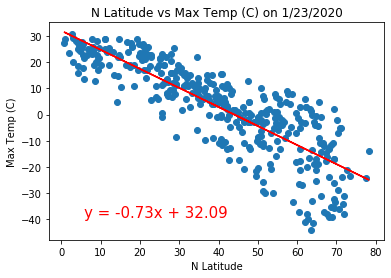

In [26]:
# Use linreg function to plot data
linreg(north["N Latitude"], north["Max Temp (C)"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41848585859456233


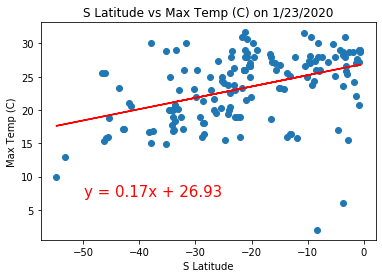

In [27]:
# Use linreg function to plot data
linreg(south["S Latitude"], south["Max Temp (C)"])

* There is a strong negative correlation between temperature and latitude in the northern hemisphere. Therefore, as the latitude goes up, the temperature goes down. 
* There is a low positive correlation between temperature and latitude in the southern hemisphere. Therefore, as the latitude goes down, so does the temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35906902781102307


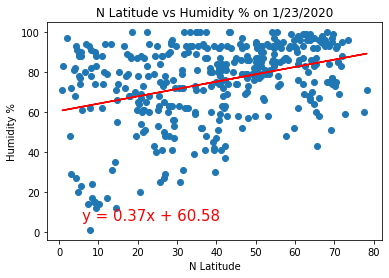

In [28]:
# Use linreg function to plot data
linreg(north["N Latitude"], north["Humidity %"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3235453583856201


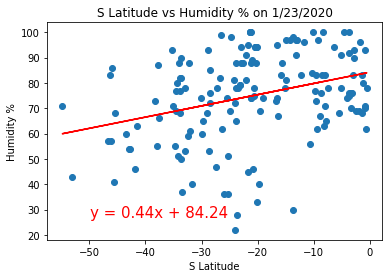

In [29]:
# Use linreg function to plot data
linreg(south["S Latitude"], south["Humidity %"])

* There is a low positive correlation between humidity and latitude in the northern hemisphere. Therefore, as the latitude goes up, so does the humidity. 
* There is also a low positive correlation between latitude and humidity in the southern hemisphere. Therefore, as the latitude goes up, so does the humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2668968515614233


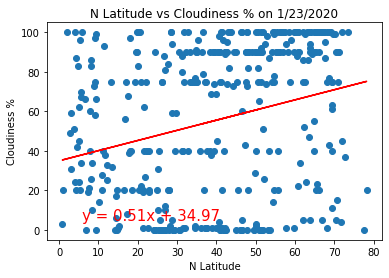

In [30]:
# Use linreg function to plot data
linreg(north["N Latitude"], north["Cloudiness %"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14222266963353677


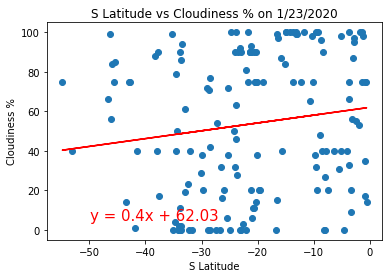

In [31]:
# Use linreg function to plot data
linreg(south["S Latitude"], south["Cloudiness %"])

* There is no correlation between cloudiness and latitude in the northern hemisphere. 
* There is no correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.22876138286480657


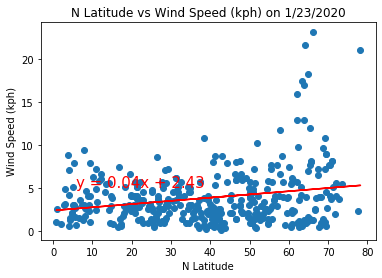

In [32]:
# Use linreg function to plot data
linreg(north["N Latitude"], north["Wind Speed (kph)"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.38569720187777856


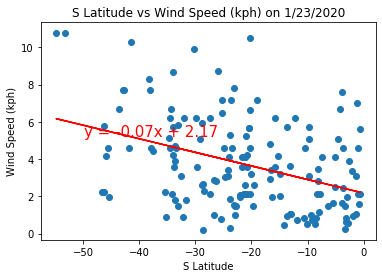

In [33]:
# Use linreg function to plot data
linreg(south["S Latitude"], south["Wind Speed (kph)"])

* There is no correlation between wind speed and latitude in the northern hemisphere. 
* There is no correlation between latitude and windspeed in the southern hemisphere.

####  General Observations
* The strongest correlations between weather phenomenon and latitude are between temperature and latitude in the northern hemisphere
* There is more land mass in the northern hemisphere, therefore, it may be possible that the correlations in the southern hemisphere were not as strong because there are not as much variety in the climate at each tested location. 
* Some weather phenomenon, like cloudiness and wind speed, are likely determined more by local geography factors rather than general observations. 
